In [6]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import math
import random
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import sklearn.metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In [7]:

# Load the dataset
df = pd.read_csv('gdrive/MyDrive/SE_Project_NNLRank/Successful_Failed_Onboarding.csv')
df = df.fillna(0)
df.head()
#print(df)

column_name=list(df.iloc[:,np.r_[0,2,10,11,12,13,14,17,18,19,21,22,23,24,25,26,29]])

print(column_name)

pro_data=df[column_name].to_numpy()

X=pro_data[:,:16]
y=pro_data[:,-1]

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=20)


['project_id', 'user_id', 'Time_Create', 'Time_Meb0', 'Time_Meb1', 'Time_Cmt0', 'Time_Cmt1', 'Tech_lang', 'Project_Member', 'Commit_Count', 'Project_Size', 'Open_Issues_Count', 'Forks', 'Watchers', 'Network_Count', 'Subscribers_Count', 'Successful_Onboarding']


In [8]:
#scaler = preprocessing.StandardScaler()
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

X_train[0]

array([1.23037466e-01, 1.22456965e-03, 1.14186622e-05, 0.00000000e+00,
       0.00000000e+00, 1.49105986e-03, 2.13310952e-01, 1.53846154e-01,
       2.54110613e-02, 6.10076096e-04, 3.94759854e-05, 7.60745531e-04,
       7.60745531e-04, 1.73334748e-03, 4.98866610e-04, 1.53682098e-03])

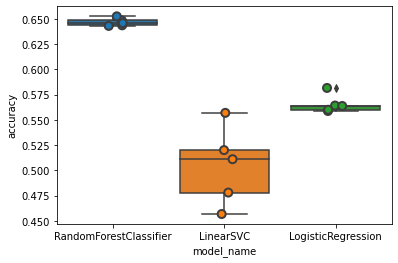

model_name
LinearSVC                 0.504533
LogisticRegression        0.565643
RandomForestClassifier    0.646676
Name: accuracy, dtype: float64

In [9]:
#Models Tested
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    LogisticRegression(random_state=0),
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
#Testing the models
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X, y, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
#Ploting the Accuracy Graph
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

#printing Accuracy with respect to the models tested
print('\n')
cv_df.groupby('model_name').accuracy.mean()




RandomForestClassifier


              precision    recall  f1-score   support

         0.0       0.64      0.51      0.57      4680
         1.0       0.66      0.78      0.71      5875

    accuracy                           0.66     10555
   macro avg       0.65      0.64      0.64     10555
weighted avg       0.65      0.66      0.65     10555

MAP: 0.7109731474464077


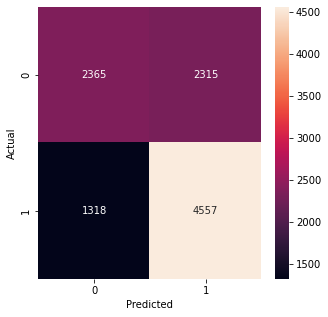



LinearSVC


              precision    recall  f1-score   support

         0.0       0.59      0.28      0.38      4680
         1.0       0.60      0.85      0.70      5875

    accuracy                           0.60     10555
   macro avg       0.59      0.56      0.54     10555
weighted avg       0.59      0.60      0.56     10555

MAP: 0.590967703480619


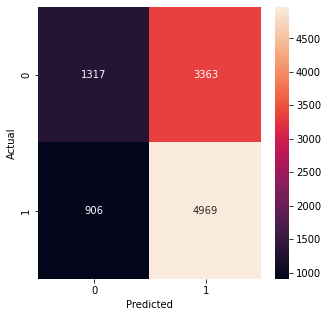



LogisticRegression


              precision    recall  f1-score   support

         0.0       0.59      0.29      0.39      4680
         1.0       0.60      0.84      0.70      5875

    accuracy                           0.60     10555
   macro avg       0.60      0.57      0.55     10555
weighted avg       0.60      0.60      0.56     10555

MAP: 0.6695825826985827


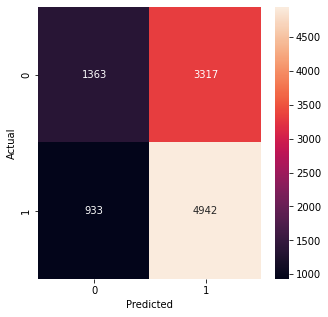

In [10]:
for model in models:
  model_name = model.__class__.__name__
  print("\n")
  print(model_name)
  print("\n")
  model.fit(X_train, y_train)
  predicted = model.predict(X_test)
  #precision,recall,f1 report
  report = classification_report(y_test, predicted)
  print(report)

  #MAP VAlues
  precision = cross_val_score(model, X, y, scoring='average_precision', cv=CV)
  precision = np.array(precision)
  MAP = np.mean(precision)
  print("MAP:",MAP)
  print('\n')
  #Confusion matrix
  conf_mat = confusion_matrix(y_test, predicted)
  fig, ax = plt.subplots(figsize=(5,5))
  sns.heatmap(conf_mat, annot=True, fmt='d')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()


